<a href="https://colab.research.google.com/github/Juanxtron/Proyecto-2/blob/main/Proyecto_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [1]:
from Datareadingcleaning_dos import df_dummies

# Ahora puedes usar datos_excel aquí
print(df_dummies)
datos_excel=df_dummies

columnas = df_dummies.columns.tolist()

columnas_sin_default = [col for col in columnas if col != "default_payment_next_month"]

print(columnas_sin_default)

#Preguntar como importar
















       LIMIT_BAL  AGE  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0          20000   24       3913       3102        689          0          0   
1         120000   26       2682       1725       2682       3272       3455   
2          90000   34      29239      14027      13559      14331      14948   
3          50000   37      46990      48233      49291      28314      28959   
4          50000   57       8617       5670      35835      20940      19146   
...          ...  ...        ...        ...        ...        ...        ...   
29596     220000   39     188948     192815     208365      88004      31237   
29597     150000   43       1683       1828       3502       8979       5190   
29598      30000   37       3565       3356       2758      20878      20582   
29599      80000   41      -1645      78379      76304      52774      11855   
29600      50000   46      47929      48905      49764      36535      32428   

       BILL_AMT6  PAY_AMT1  PAY_AMT2  .

In [2]:
# Importar las librerías necesarias
import tensorflow as tf
import numpy as np
from tensorflow import keras
#import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#from keras.models import Sequential
#from keras.layers import Dense
#from keras.callbacks import EarlyStopping


from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
# split into X and Y
Y = df_dummies['default payment next month']
X = df_dummies.drop(['default payment next month'], axis=1)

print(X.shape)
print(Y.shape)

# convert to numpy arrays
X = np.array(X)

(29601, 81)
(29601,)


In [5]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.3, random_state=42)

# Escalar los datos (opcional, pero es común en redes neuronales)
std_scl = StandardScaler()
std_scl.fit(X_train)

print(X_train[0:3,])
X_train = std_scl.transform(X_train)
print(X_train[0:3,])
X_valid = std_scl.transform(X_valid)
X_test = std_scl.transform(X_test)

######Ya se cambio la proporción de entrenamiento y prueba. Mirar lo de cross validation como serviria para hallar el numero de neuronas y capas.


[[300000     32  26575  27062  20111   8738    250      0   1321   9160
    1000    250      0      0      1      0      0      0      0      1
       0      0      1      0      1      0      0      0      0      0
       0      0      0      0      1      0      0      0      0      0
       0      0      0      0      1      0      0      0      0      0
       0      0      0      0      1      0      0      0      0      0
       0      0      0      0      1      0      0      0      0      0
       0      0      1      0      0      0      0      0      0      0
       0]
 [ 30000     22  11222  11738  13255  14380  14081  10796   1000   2000
    1670    551      0    500      1      0      0      0      0      1
       0      0      1      0      1      0      0      0      0      0
       0      0      0      0      0      0      0      0      0      0
       0      0      1      0      0      0      0      0      0      0
       0      0      1      0      0      0      0    

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import itertools
tf.keras.backend.clear_session()
# Definir los datos de entrenamiento y validación (X_train, X_valid, y_train, y_valid)
# Supongamos que ya están definidos

# Definir la configuración de hiperparámetros a explorar
hidden_layers = [1, 2, 3]  # Cantidad de capas ocultas
neurons_per_layer = [16, 32, 64]  # Número de neuronas por capa
optimizers = ['RMSPROP', 'ADAM', 'NADAM']  # Tipos de optimizadores

# Inicializar un diccionario para almacenar los resultados
results = {}

# Iterar sobre las combinaciones de hiperparámetros
for num_layers, num_neurons, optimizer in itertools.product(hidden_layers, neurons_per_layer, optimizers):
    # Crear modelo
    model = Sequential()
    model.add(Dense(num_neurons, input_shape=(81,), activation="relu"))
    for _ in range(num_layers - 1):
        model.add(Dense(num_neurons, activation="relu"))
    model.add(Dense(1, activation='sigmoid'))

    # Compilar modelo
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=["accuracy"])

    # Entrenar modelo
    history = model.fit(X_train, y_train, epochs=100,
                        validation_data=(X_valid, y_valid),
                        verbose=0)

    # Evaluar modelo en datos de validación
    val_loss, val_accuracy = model.evaluate(X_valid, y_valid)

    # Almacenar los resultados en el diccionario
    results[(num_layers, num_neurons, optimizer)] = {'loss': val_loss, 'accuracy': val_accuracy}

# Encontrar la mejor configuración
best_configuration = min(results, key=lambda x: results[x]['loss'])

print("Mejor configuración:")
print("Número de capas ocultas:", best_configuration[0])
print("Número de neuronas por capa:", best_configuration[1])
print("Optimizador:", best_configuration[2])
print("Loss:", results[best_configuration]['loss'])
print("Accuracy:", results[best_configuration]['accuracy'])





195/195 [==============================] - 0s 2ms/step - loss: 1.2651 - accuracy: 0.7642
Mejor configuración:
Número de capas ocultas: 1
Número de neuronas por capa: 16
Optimizador: RMSPROP
Loss: 0.47679269313812256
Accuracy: 0.8174067139625549


[0.47679269313812256, 0.5627585053443909, 0.5832453370094299, 0.49260082840919495, 0.49734383821487427, 0.5988592505455017, 0.502419114112854, 0.5182369351387024, 0.5878105163574219, 0.4818502366542816, 0.5100266337394714, 0.5033155083656311, 0.5741080045700073, 0.5783932209014893, 0.5931842923164368, 0.7145817875862122, 0.8162669539451599, 0.8776077032089233, 0.5107552409172058, 0.5189691781997681, 0.5345888137817383, 0.6787185668945312, 0.7191886901855469, 0.7070975303649902, 1.353139877319336, 1.442408561706543, 1.2650501728057861]


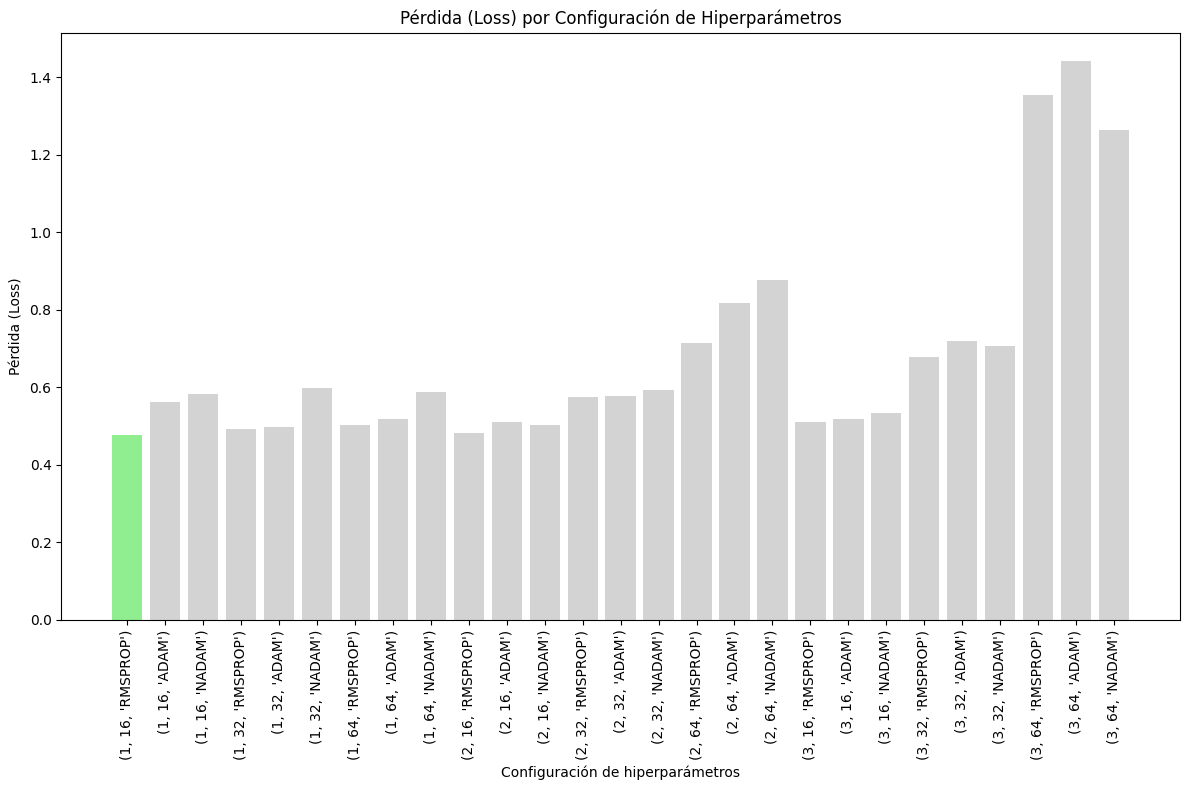

0.4563247859477997


In [8]:
import matplotlib.pyplot as plt

# Diccionario de resultados (ya definido previamente)
# results = {...}

# Extraer pérdidas (loss) y configuraciones
losses = [results[key]['loss'] for key in results]
configurations = [str(key) for key in results]

# Encontrar la configuración con la menor pérdida
min_loss_index = losses.index(min(losses))
# Crear lista de colores para las barras
colors = ['lightgrey'] * len(losses)
colors[min_loss_index] = 'skyblue'

# Crear gráfico de barras para pérdidas
plt.figure(figsize=(12, 8))
plt.bar(configurations, losses, color=colors)
plt.xlabel('Configuración de hiperparámetros')
plt.ylabel('Pérdida (Loss)')
plt.title('Pérdida (Loss) por Configuración de Hiperparámetros')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



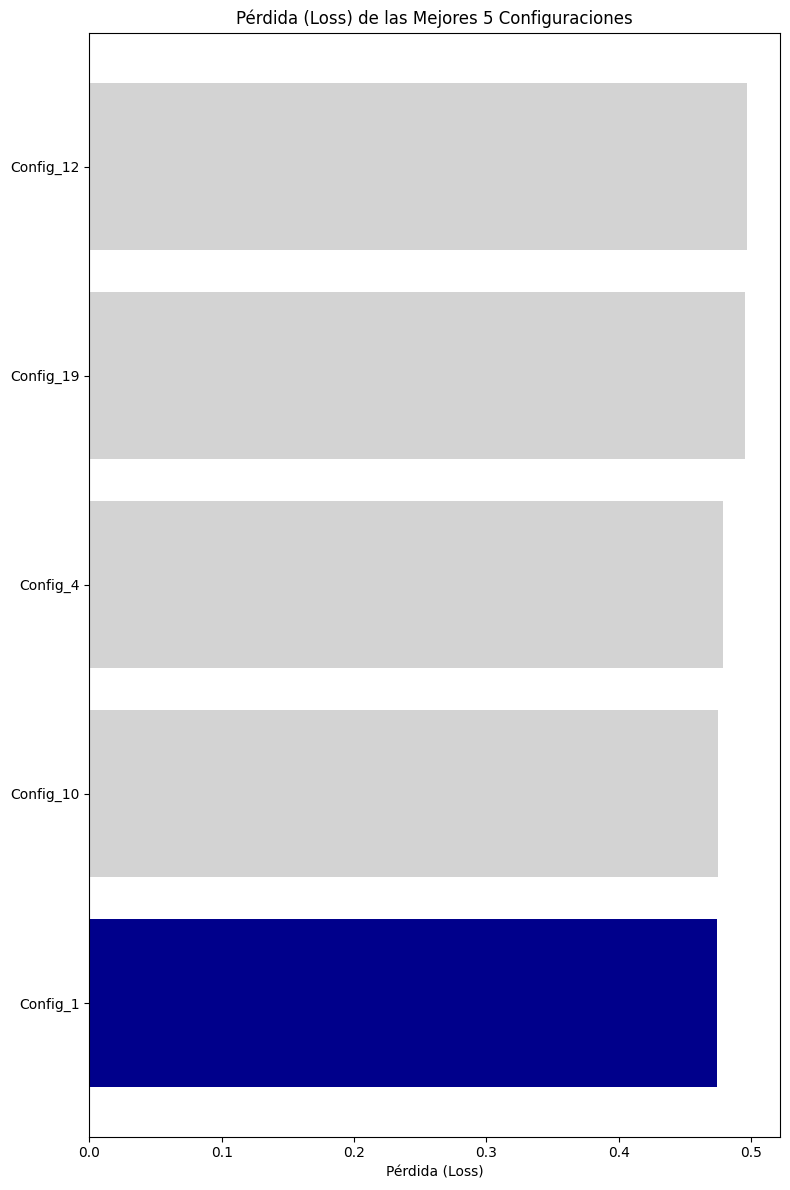

In [20]:
import matplotlib.pyplot as plt

# Lista de pérdidas
losses = [0.4741571843624115, 0.5452190637588501, 0.5126498341560364, 0.47884684801101685, 0.5742620825767517, 0.4988696575164795, 0.5193626880645752, 0.5565668940544128, 0.6158826947212219, 0.47515061497688293, 0.523634135723114, 0.4968118369579315, 0.572287917137146, 0.5941821336746216, 0.6058449149131775, 0.7632342576980591, 0.9236568808555603, 0.8804336190223694, 0.4955539107322693, 0.527826726436615, 0.5264521837234497, 0.6443580985069275, 0.7779607176780701, 0.7741563320159912, 1.1677849292755127, 1.640720248222351, 1.627382755279541]

# Crear una lista de nombres de configuraciones
configuration_names = [f'Config_{i}' for i in range(1, len(losses) + 1)]

# Ordenar las pérdidas y los nombres de configuración
sorted_indices = sorted(range(len(losses)), key=lambda k: losses[k])
sorted_losses = [losses[i] for i in sorted_indices]
sorted_configurations = [configuration_names[i] for i in sorted_indices]

# Seleccionar los mejores 5 resultados
best_losses = sorted_losses[:5]
best_configurations = sorted_configurations[:5]

# Crear lista de colores para las barras
colors = ['lightgrey'] * len(best_losses)
min_loss_index = best_losses.index(min(best_losses))
colors[min_loss_index] = 'darkblue'

# Crear gráfico de barras para pérdidas
plt.figure(figsize=(8, 12))  # Cambiar tamaño para gráfico vertical
plt.barh(best_configurations, best_losses, color=colors)  # Usar plt.barh() para gráfico vertical
plt.xlabel('Pérdida (Loss)')  # Cambiar xlabel
plt.title('Pérdida (Loss) de las Mejores 5 Configuraciones')
plt.tight_layout()
plt.show()

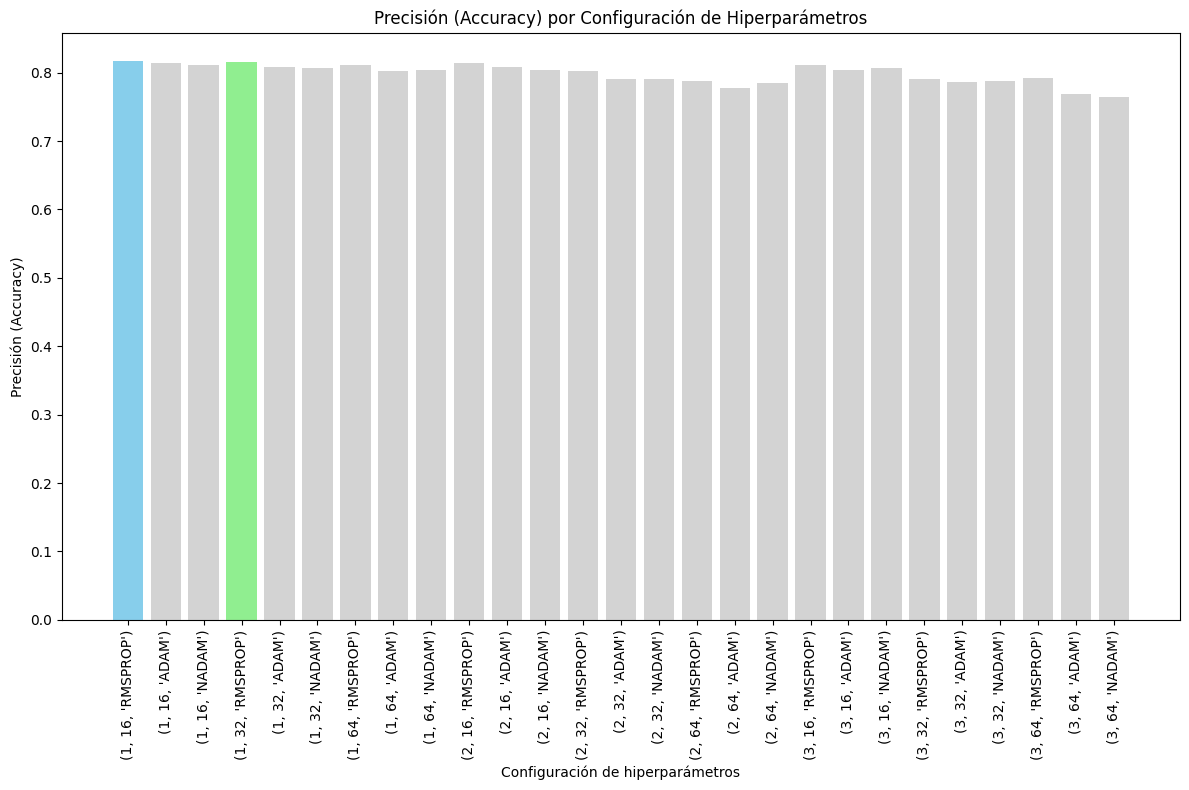

In [14]:
import matplotlib.pyplot as plt

# Diccionario de resultados (ya definido previamente)
# results = {...}

# Extraer accuracies y configuraciones
accuracies = [results[key]['accuracy'] for key in results]
configurations = [str(key) for key in results]

# Encontrar el índice del máximo accuracy
max_accuracy_index = accuracies.index(max(accuracies))

# Encontrar el índice del segundo mejor accuracy
accuracies_sorted = sorted(accuracies, reverse=True)
second_best_accuracy = accuracies_sorted[1]
second_best_index = accuracies.index(second_best_accuracy)

# Encontrar el índice de la combinación (1, 16, 'NADAM')


# Crear lista de colores para las barras
colors = ['lightgrey'] * len(accuracies)
colors[max_accuracy_index] = 'skyblue'
colors[second_best_index] = 'lightgreen'


# Crear gráfico de barras para accuracies
plt.figure(figsize=(12, 8))
plt.bar(configurations, accuracies, color=colors)
plt.xlabel('Configuración de hiperparámetros')
plt.ylabel('Precisión (Accuracy)')
plt.title('Precisión (Accuracy) por Configuración de Hiperparámetros')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()




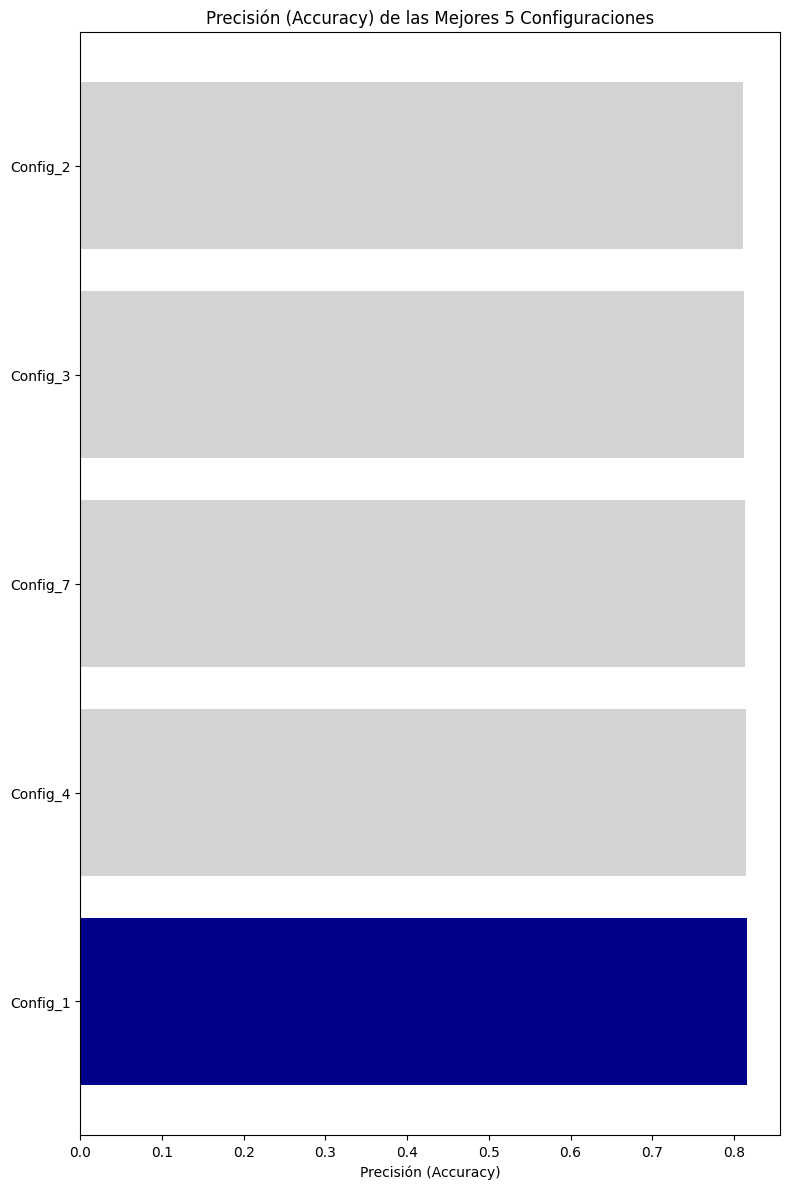

In [22]:
import matplotlib.pyplot as plt

# Lista de accuracies
accuracies = [0.8156370520591736, 0.8108108043670654, 0.8117760419845581, 0.815315306186676, 0.8040540814399719, 0.801962673664093, 0.8130630850791931, 0.7990669012069702, 0.7993886470794678, 0.8100064396858215, 0.8008365631103516, 0.8038932085037231, 0.8104890584945679, 0.7939189076423645, 0.7911840677261353, 0.7841055393218994, 0.7652831673622131, 0.7763835191726685, 0.8075932860374451, 0.795045018196106, 0.8090412020683289, 0.8014800548553467, 0.7789575457572937, 0.7776705026626587, 0.7762226462364197, 0.7522522807121277, 0.7575611472129822]

# Lista de configuraciones
configurations = [f'Config_{i}' for i in range(1, len(accuracies) + 1)]

# Ordenar las accuracies y las configuraciones
sorted_indices = sorted(range(len(accuracies)), key=lambda k: accuracies[k], reverse=True)
sorted_accuracies = [accuracies[i] for i in sorted_indices]
sorted_configurations = [configurations[i] for i in sorted_indices]

# Seleccionar los mejores 5 resultados
best_accuracies = sorted_accuracies[:5]
best_configurations = sorted_configurations[:5]

# Crear lista de colores para las barras
colors = ['lightgrey'] * len(best_accuracies)
min_accuracy_index = best_accuracies.index(max(best_accuracies))
colors[min_accuracy_index] = 'darkblue'

# Crear gráfico de barras para accuracies
plt.figure(figsize=(8, 12))  # Cambiar tamaño para gráfico vertical
plt.barh(best_configurations, best_accuracies, color=colors)  # Usar plt.barh() para gráfico vertical
plt.xlabel('Precisión (Accuracy)')  # Cambiar xlabel
plt.title('Precisión (Accuracy) de las Mejores 5 Configuraciones')
plt.tight_layout()
plt.show()


In [10]:
tf.random.set_seed(42)
tf.keras.backend.clear_session()

model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(81,)))
model.add(tf.keras.layers.Dense(16, activation="relu"))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                1312      
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1329 (5.19 KB)
Trainable params: 1329 (5.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
model.compile(loss='binary_crossentropy',
              optimizer='RMSPROP',
              metrics=["accuracy"])

In [12]:
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid))

Epoch 1/100
454/454 [==============================] - 2s 3ms/step - loss: 0.5246 - accuracy: 0.7922 - val_loss: 0.5120 - val_accuracy: 0.8147
Epoch 2/100
454/454 [==============================] - 1s 3ms/step - loss: 0.4560 - accuracy: 0.8220 - val_loss: 0.4889 - val_accuracy: 0.8171
Epoch 3/100
454/454 [==============================] - 1s 3ms/step - loss: 0.4457 - accuracy: 0.8232 - val_loss: 0.4815 - val_accuracy: 0.8172
Epoch 4/100
454/454 [==============================] - 1s 3ms/step - loss: 0.4393 - accuracy: 0.8247 - val_loss: 0.4755 - val_accuracy: 0.8184
Epoch 5/100
454/454 [==============================] - 1s 3ms/step - loss: 0.4357 - accuracy: 0.8239 - val_loss: 0.4695 - val_accuracy: 0.8177
Epoch 6/100
454/454 [==============================] - 1s 3ms/step - loss: 0.4326 - accuracy: 0.8250 - val_loss: 0.4674 - val_accuracy: 0.8177
Epoch 7/100
454/454 [==============================] - 1s 3ms/step - loss: 0.4307 - accuracy: 0.8242 - val_loss: 0.4664 - val_accuracy: 0.8190

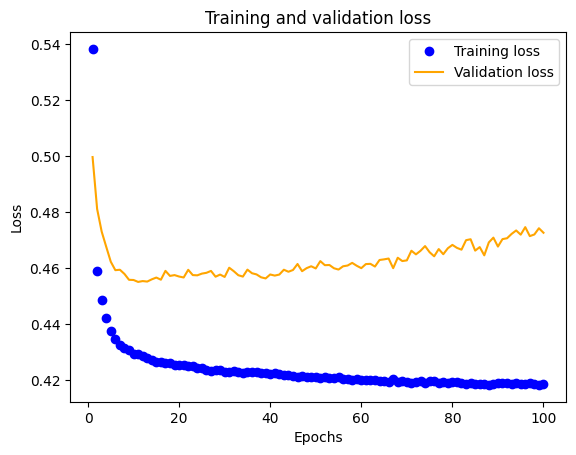

In [20]:
import matplotlib.pyplot as plt
history_dict = history.history
# Learning curve(Loss)
# let's see the training and validation loss by epoch

# loss
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this

# range of X (no. of epochs)
epochs = range(1, len(loss_values) + 1)

# plot
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

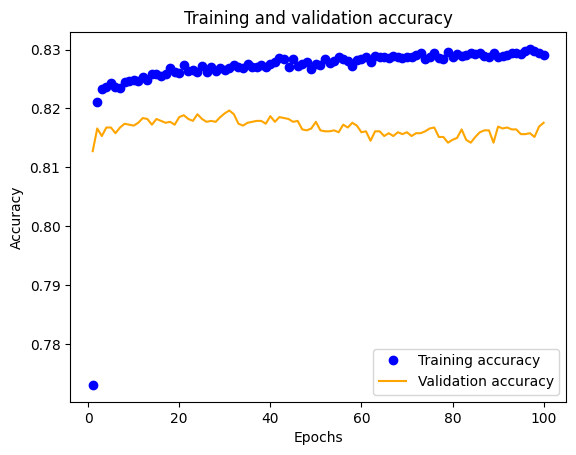

0.8196589350700378

In [21]:
# Learning curve(accuracy)
# let's see the training and validation accuracy by epoch

# accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# range of X (no. of epochs)
epochs = range(1, len(acc) + 1)

# plot
# "bo" is for "blue dot"
plt.plot(epochs, acc, 'bo', label='Training accuracy')
# orange is for "orange"
plt.plot(epochs, val_acc, 'orange', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# this is the max value - should correspond to
# the HIGHEST train accuracy
np.max(val_acc)

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# see how these are numbers between 0 and 1?
model.predict(X_test) # prob of successes (survival)
np.round(model.predict(X_test),0) # 1 and 0 (survival or not)
y_test # 1 and 0 (survival or not)

# so we need to round to a whole number (0 or 1),
# or the confusion matrix won't work!
preds = np.round(model.predict(X_test),0)

# confusion matrix
print(confusion_matrix(y_test, preds)) # order matters! (actual, predicted)

## array([[490,  59],   ([[TN, FP],
##       [105, 235]])     [Fn, TP]])

print(classification_report(y_test, preds))
##               precision    recall  f1-score   support
##
##            0       0.82      0.89      0.86       549
##            1       0.80      0.69      0.74       340
##
##     accuracy                           0.82       889
##    macro avg       0.81      0.79      0.80       889
## weighted avg       0.81      0.82      0.81       889

278/278 [==============================] - 1s 2ms/step
[[6483  376]
 [1280  742]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      6859
           1       0.66      0.37      0.47      2022

    accuracy                           0.81      8881
   macro avg       0.75      0.66      0.68      8881
weighted avg       0.80      0.81      0.79      8881



In [19]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Obtener probabilidades de predicción
y_proba = model.predict(X_test)

# Aplicar el umbral de clasificación
threshold = 0.6
preds = (y_proba >= threshold).astype(int)

# Confusion matrix
print(confusion_matrix(y_test, preds)) # order matters! (actual, predicted)

## array([[490,  59],   ([[TN, FP],
##       [105, 235]])     [Fn, TP]])
print(classification_report(y_test, preds))



278/278 [==============================] - 0s 2ms/step
[[6591  268]
 [1423  599]]
              precision    recall  f1-score   support

           0       0.82      0.96      0.89      6859
           1       0.69      0.30      0.41      2022

    accuracy                           0.81      8881
   macro avg       0.76      0.63      0.65      8881
weighted avg       0.79      0.81      0.78      8881



In [ ]:
# Guardar el modelo en Google Drive
model.save('/content/drive/My Drive/riesgo_credito_usando30_continuos.keras')
#Poner ruta personalizada